# Removing outliers

The next steps are to remove any outliers from the columns. This requires a somewhat subtle approach, and steps need to be taken to differentiate genuine outliers from relevant datapoints.

To illustrate what I mean, let's look at the histogram for the last_payment_amount

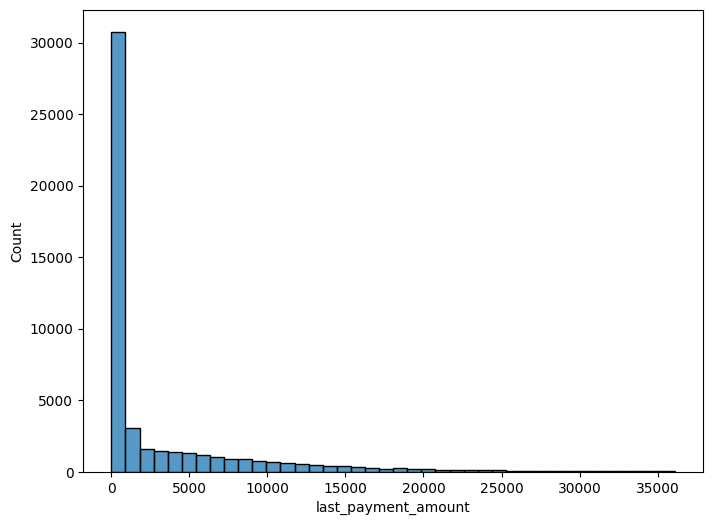

In [1]:
from data_imputer import Plotter
import pandas as pd

df = pd.read_csv('unskewed_data.csv')

# Create instance of graphs and check the outliers

graph = Plotter(df)
graph.check_outliers('last_payment_amount', 'histogram')

Despite the majority of payment amounts being on the lower end, the distribution follows a clear negative trend as the payment amount increases. Indeed, if we look at the (very chaotic) scatter plot, it's safe to say no points in this column are genuine outliers.

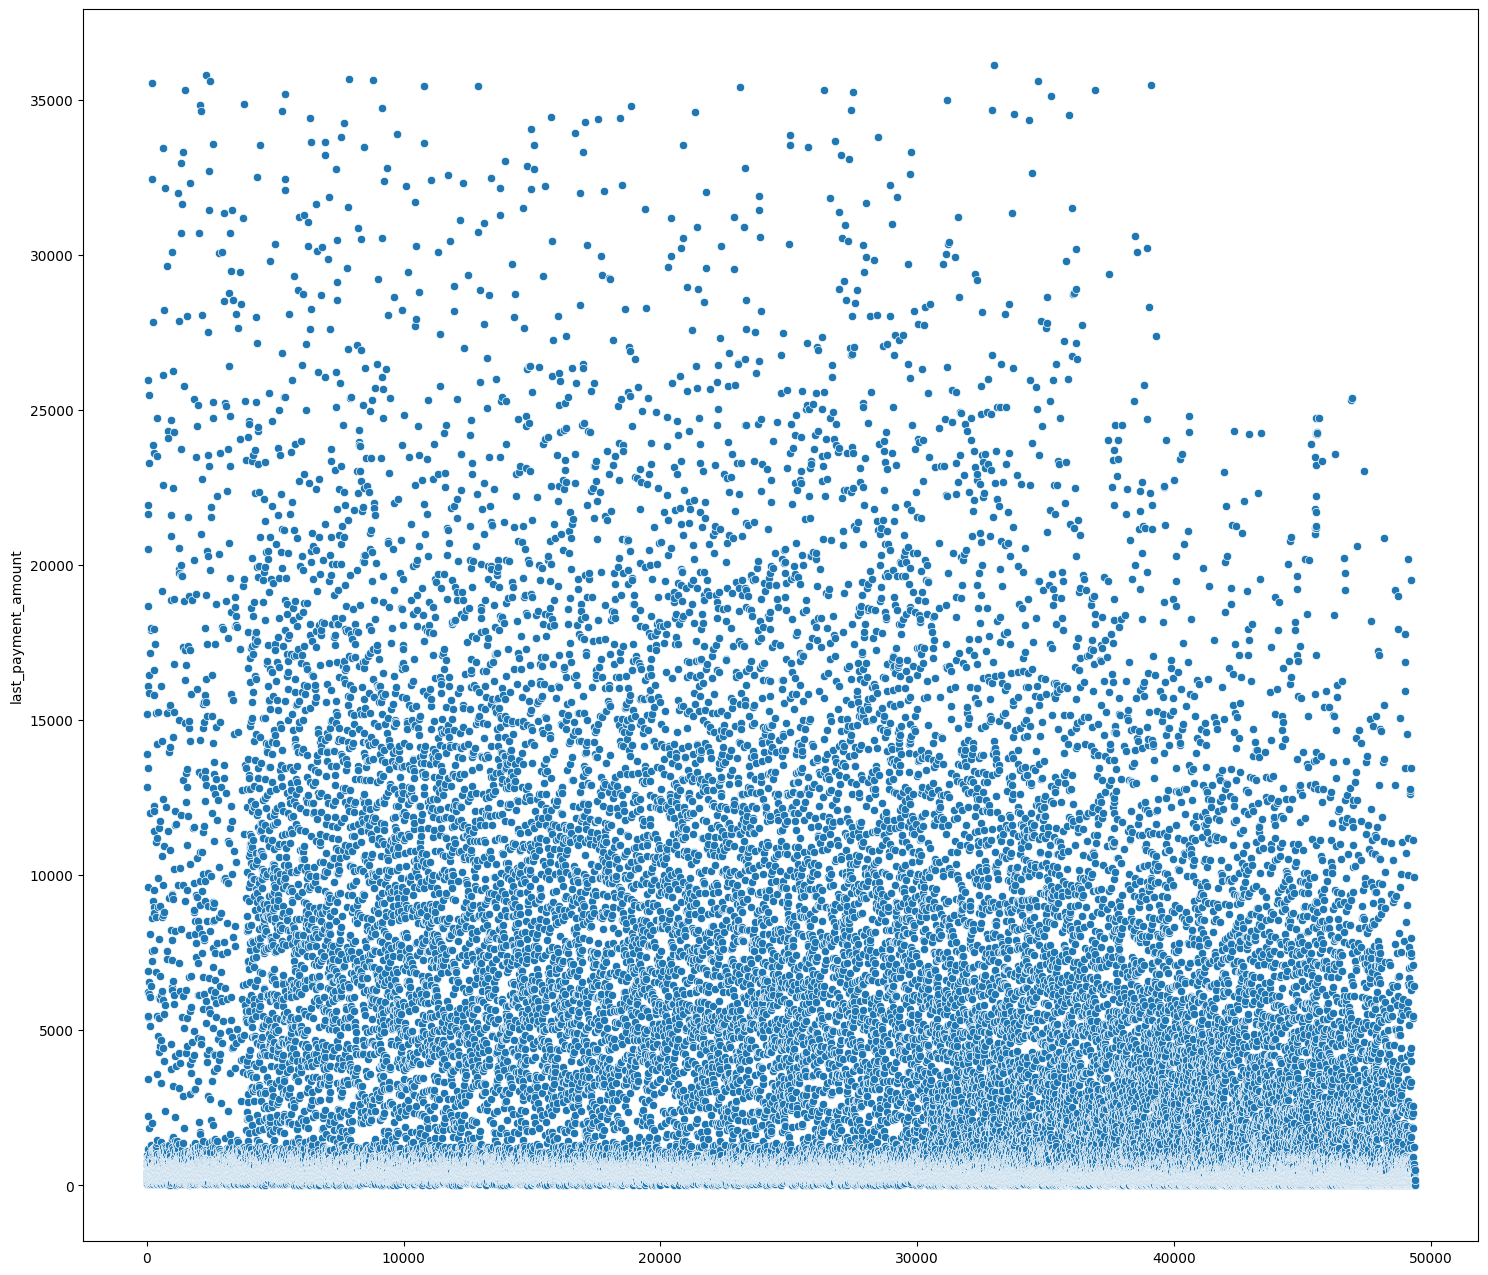

In [2]:
graph.check_outliers('last_payment_amount', 'scatter')

With this many datapoints, visual representations of graphs are likely not going to identify any outliers in the data, illustrated by the mess above. Perhaps statistical methods are the best bet. Let's try the Z-score method for some of the numerical columns, and show the top 20 largest z-scores. It is going to be a very arduous task to show me checking every individual column here, as there are over 20 numeric ones to go through. For now, I have picked out 5 columns which pose likely to have outliers, these are:

- annual_inc
- open_accouts
- total_payment
- total_rec_int
- total_rec_late_fee

Let's go one by one, and first look at the annuam income:


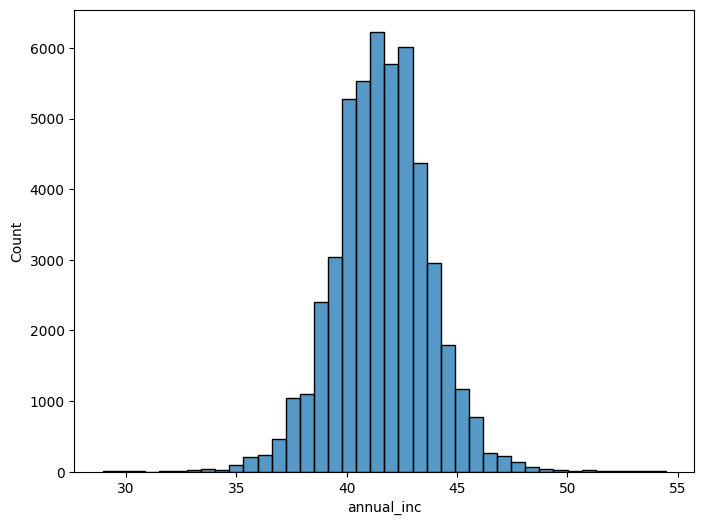

In [3]:
graph.check_outliers('annual_inc', 'histogram')

The distribution looks fair and it normalized. Let's check the zscores:

In [4]:
graph.check_outliers('annual_inc', method='zscore')

41683    4.700379
41981    4.720559
46037    4.720559
28487    4.791811
39868    4.805677
17156    4.809125
47327   -4.825116
40528    4.866585
4029     4.892904
3650     4.892904
43516    5.018167
49113   -5.025314
46843   -5.073002
46062   -5.111274
47251   -5.111274
40716   -5.111274
42385   -5.111274
41233    5.188796
35090    5.254641
46077    5.392570
44354   -5.393336
43627   -5.454744
45928    5.481733
49369   -5.496730
29743    5.557514
3217    -5.720600
48683   -5.906086
40935    5.921501
25850    6.002133
48771    6.033035
Name: annual_inc, dtype: float64

These datapoints all look fair and follow a steady absolute zscore, so there are not any clear outliers for this column. Remember here that my methodology is to only identify CLEAR outliers which do not belong in the dataset.

Next, open_accounts

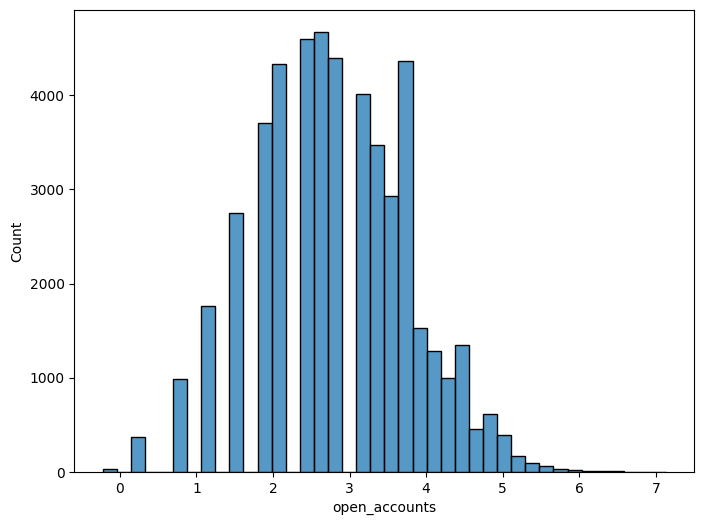

In [5]:
graph.check_outliers('open_accounts', 'histogram')

This column originally contained discrete data, but was changed in the skew transformation. Regardless, there does not seem to be any clear outliers as the data does follow a normal distribution. Let's look at the z-scores

In [6]:
graph.check_outliers('open_accounts', method='zscore')

3262     3.357186
24842    3.357186
3009     3.431975
3191     3.431975
39283    3.431975
29598    3.431975
16720    3.505068
16842    3.505068
2981     3.505068
28393    3.505068
1884     3.505068
9310     3.505068
21701    3.505068
3175     3.576544
48880    3.646475
3853     3.646475
3445     3.646475
13232    3.646475
13212    3.646475
5182     3.714929
3610     3.714929
3260     3.714929
23100    3.781971
30238    3.781971
3696     3.781971
387      3.781971
48582    3.975199
48941    4.037150
2368     4.097953
17327    4.386174
Name: open_accounts, dtype: float64

There is one value at the end of this list which is a potential outlier, with a Z-score of 4.386 where the next closest is below 4.1. Let's remove this outlier.

In [ ]:
# Create instance of class and drop the row with the outlier

drop_row = DataFrameTransform()

Next, let's look at total_payment:

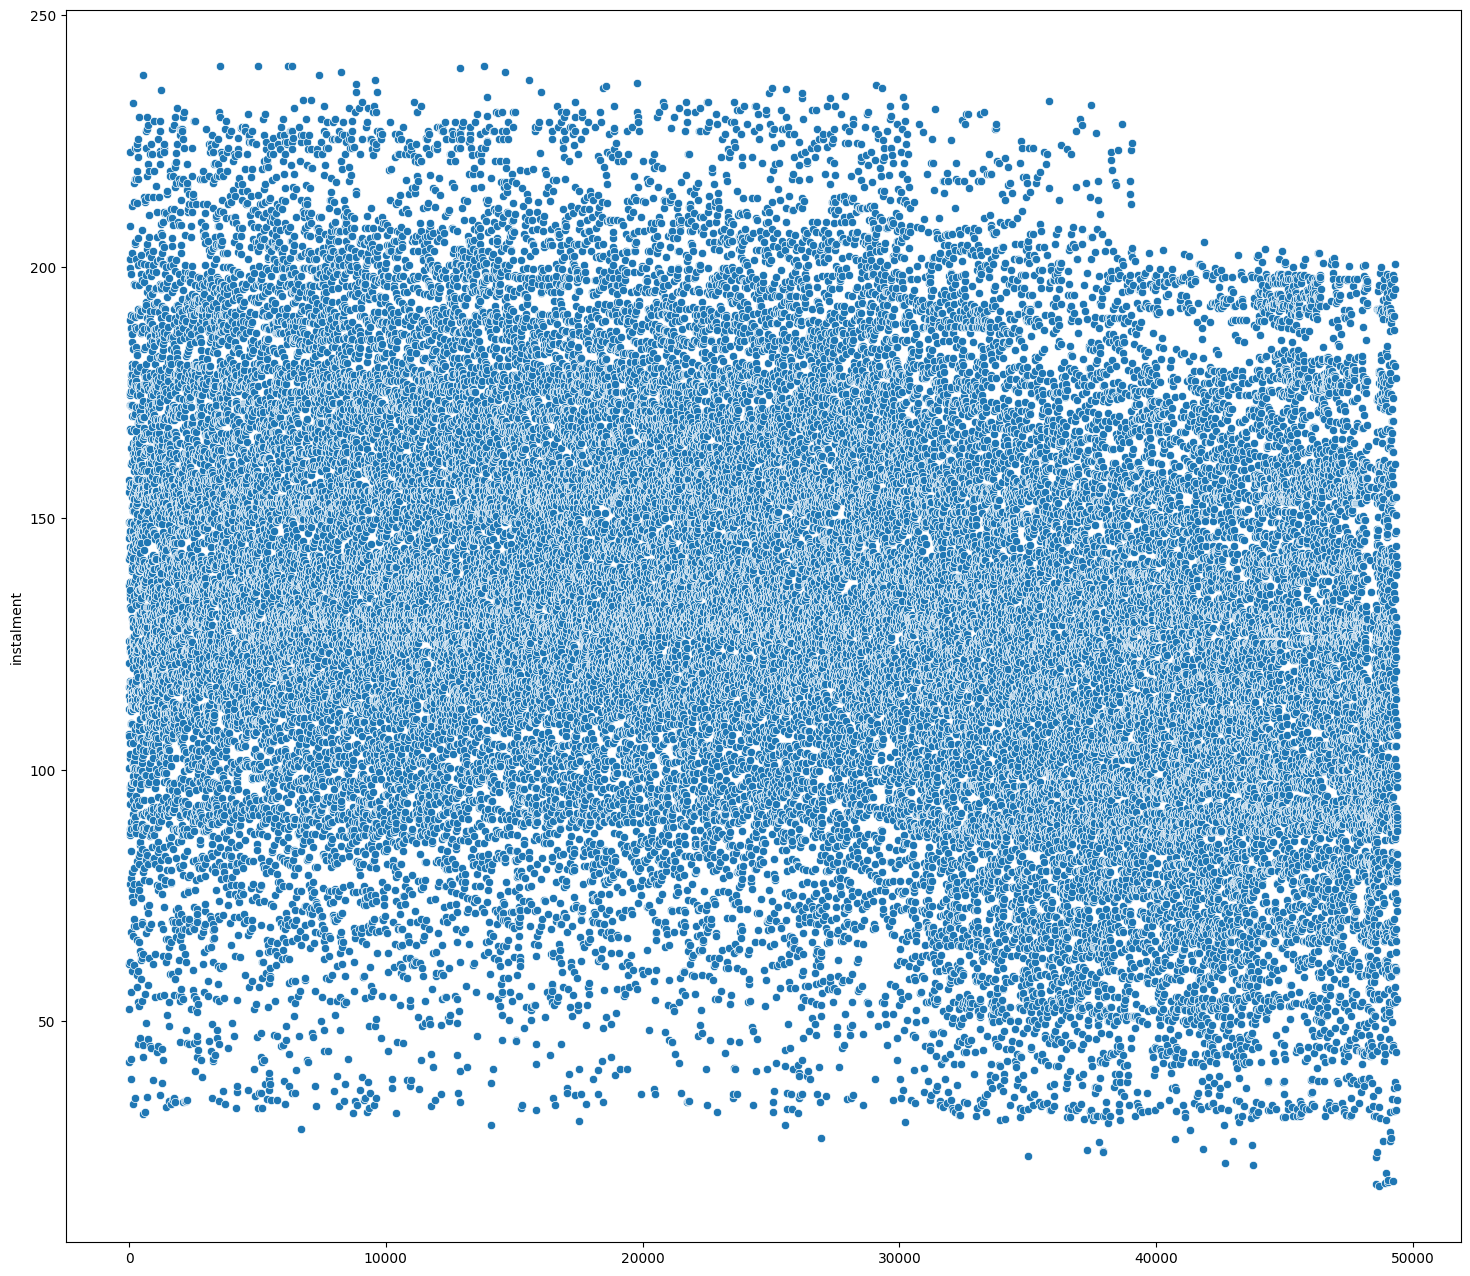

In [7]:
graph.check_outliers('instalment', 'scatter')

In [8]:
from data_info import DataFrameInfo

missing_value_columns = DataFrameInfo()
print(missing_value_columns.percentage_of_missing(df, 0))

funded_amount                   5.544799
term                            8.799395
int_rate                        9.531449
employment_length               3.905515
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
last_payment_date               0.134609
next_payment_date              60.127971
last_credit_pull_date           0.012908
collections_12_mths_ex_med      0.094042
mths_since_last_major_derog    86.172116
dtype: float64
Series([], dtype: float64)
